<a href="https://colab.research.google.com/github/eddercipras/maiz/blob/main/Evaluacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import plotly.express as px
import pickle
import os

# 1. Ingesta de logs

## 1.1. Listamos todos los logs en la carpeta de logs y establecemos su ruta

In [44]:
path_logs = "/content/drive/MyDrive/proyecto/logs"
logs = os.listdir(path_logs)
full_logs = [os.path.join(path_logs, log) for log in logs]

## 1.2. Los cargamos en un dataframe todos juntos

In [5]:
# for full_log, log in zip(full_logs, logs):
#   print(f"log: {log}, full_log: {full_log}")

log: EfficienteNetV2BO-20221221-181519, full_log: /content/drive/MyDrive/proyecto/logs/EfficienteNetV2BO-20221221-181519
log: MobileNetV220221222-210110, full_log: /content/drive/MyDrive/proyecto/logs/MobileNetV220221222-210110
log: ResNet50-20221223-161945, full_log: /content/drive/MyDrive/proyecto/logs/ResNet50-20221223-161945
log: DenseNet201-20221227-143443, full_log: /content/drive/MyDrive/proyecto/logs/DenseNet201-20221227-143443


In [6]:
# with open(full_logs[0], "rb") as file_pi:
#     history = pd.DataFrame(pickle.load(file_pi))
#     history["model"] = logs[0]
# history

,loss,accuracy,val_loss,val_accuracy,lr,model
0,13.211640,0.780364,12.345143,0.425329,0.00100,EfficienteNetV2BO-20221221-181519
1,10.472252,0.849597,9.077770,0.749104,0.00100,EfficienteNetV2BO-20221221-181519
2,8.266129,0.885407,7.335583,0.869773,0.00100,EfficienteNetV2BO-20221221-181519
3,6.682577,0.908684,6.026490,0.870968,0.00100,EfficienteNetV2BO-20221221-181519
4,5.450991,0.916741,4.930354,0.891278,0.00100,EfficienteNetV2BO-20221221-181519
5,4.398444,0.934050,4.061452,0.857826,0.00100,EfficienteNetV2BO-20221221-181519
6,3.555856,0.942107,3.299984,0.887694,0.00100,EfficienteNetV2BO-20221221-181519
7,2.913352,0.945986,2.888980,0.776583,0.00100,EfficienteNetV2BO-20221221-181519
8,2.427136,0.948075,2.455265,0.836320,0.00100,EfficienteNetV2BO-20221221-181519
9,2.049077,0.950761,2.105239,0.868578,0.00100,EfficienteNetV2BO-20221221-181519


In [45]:
data_logs = []
for full_log, log in zip(full_logs, logs):
  with open(full_log, "rb") as file_pi:
    history = pd.DataFrame(pickle.load(file_pi))
    history["model"] = log
    data_logs.append(history)

data_logs = pd.concat(data_logs)
data_logs

,loss,accuracy,val_loss,val_accuracy,lr,model
0,13.211640,0.780364,12.345143,0.425329,0.001,EfficienteNetV2BO-20221221-181519
1,10.472252,0.849597,9.077770,0.749104,0.001,EfficienteNetV2BO-20221221-181519
2,8.266129,0.885407,7.335583,0.869773,0.001,EfficienteNetV2BO-20221221-181519
3,6.682577,0.908684,6.026490,0.870968,0.001,EfficienteNetV2BO-20221221-181519
4,5.450991,0.916741,4.930354,0.891278,0.001,EfficienteNetV2BO-20221221-181519
...,...,...,...,...,...,...
5,2.957922,0.935840,4.348526,0.278375,0.001,ResNet50-20221228-035558
6,2.272716,0.942107,3.285952,0.448029,0.001,ResNet50-20221228-035558
7,1.772859,0.951656,2.311636,0.629630,0.001,ResNet50-20221228-035558
8,1.410130,0.943300,1.685116,0.769415,0.001,ResNet50-20221228-035558


# 2. Revisión de los entrenamientos

## 2.1. Precisión máxima:
es la máxima precisión obtenida por cada modelo y las epochs que le tomó lograrlo: ResNet50 logra la mayor precisión en el menor número de epochs, pero es el modelo más pesado; aunque no el que tiene el mayor número de parámetros

In [46]:
effort = data_logs.groupby("model")["val_accuracy"].agg(["max", "idxmax"])
effort["epoch"] = effort["idxmax"] + 1
effort.drop("idxmax", axis=1, inplace=True)
effort

,max,epoch
model,,
DenseNet201-20221227-143443,0.971326,29
EfficienteNetV2BO-20221221-181519,0.962963,32
MobileNetV220221222-210110,0.956989,43
ResNet50-20221223-161945,0.968937,19
ResNet50-20221228-035558,0.934289,10


## 2.2. Peso o costo de entrenamiento de los modelos:
Estos son los pesos y números de parámetros de cada modelo: lo que cuesta entrenarlos

In [47]:
modelos = {"ResNet50": {"size_MB": 50, "parameters_M": 25.6}, 
           "EfficienteNetV2BO": {"size_MB": 29, "parameters_M": 7.2},
           "MobileNetV2": {"size_MB": 14, "parameters_M": 3.5},
           "DenseNet201": {"size_MB": 80, "parameters_M": 20.2}}
pd.DataFrame(modelos).T

,size_MB,parameters_M
ResNet50,50.0,25.6
EfficienteNetV2BO,29.0,7.2
MobileNetV2,14.0,3.5
DenseNet201,80.0,20.2


# 3. Curvas de entenamiento

## 3.1. Loss

In [48]:
data_logs["epoch"] = data_logs.index + 1
fig = px.line(data_logs, x="epoch", y=["val_loss"], color="model", template="plotly_white", title="val_loss")
fig.show()

## 3.2. Accuracy o precisión

In [49]:
fig = px.line(data_logs, x="epoch", y=["val_accuracy"], color="model", template="plotly_white", title="val_accuracy")
fig.show()

# 4. Predicciones

In [18]:
import keras
import tensorflow

## 4.1. Tomamos el mejor modelo para hacer las predicciones

In [19]:
model = keras.models.load_model("/content/drive/MyDrive/proyecto/models/DenseNet201.29-0.97.h5")

## 4.2. Cargamos imágenes no vistas por el modelo y realizamos predicciones sobre ellas

Populating the interactive namespace from numpy and matplotlib


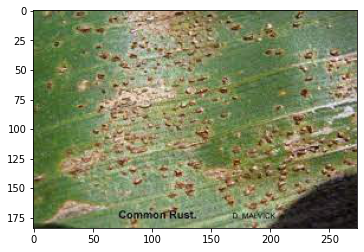

1/1 [==============================] - 0s 327ms/step
This image (['test', 'common_rust.jpeg']) is:
 0.04 percent Blight
 0.88 percent Common_Rust
 0.06 Gray_Leaf_Spot
 0.03 Healthy


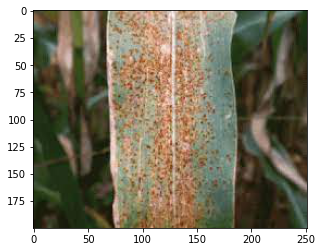

1/1 [==============================] - 0s 315ms/step
This image (['test', 'common_rust_2.jpeg']) is:
 0.20 percent Blight
 0.39 percent Common_Rust
 0.32 Gray_Leaf_Spot
 0.09 Healthy


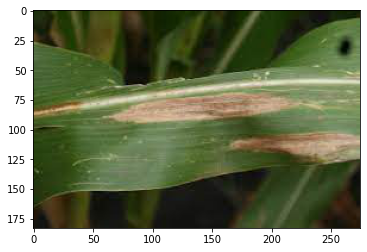

1/1 [==============================] - 0s 323ms/step
This image (['test', 'blight.jpeg']) is:
 1.00 percent Blight
 0.00 percent Common_Rust
 0.00 Gray_Leaf_Spot
 0.00 Healthy


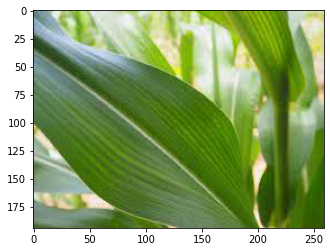

1/1 [==============================] - 0s 319ms/step
This image (['test', 'healthy.jpeg']) is:
 0.50 percent Blight
 0.12 percent Common_Rust
 0.21 Gray_Leaf_Spot
 0.17 Healthy


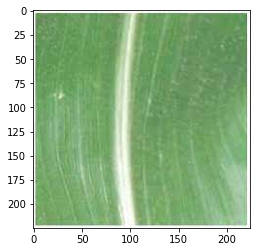

1/1 [==============================] - 0s 329ms/step
This image (['test', 'healthy_2.jpeg']) is:
 0.01 percent Blight
 0.01 percent Common_Rust
 0.01 Gray_Leaf_Spot
 0.97 Healthy


In [42]:
%pylab inline
images = ["/content/drive/MyDrive/proyecto/data/test/common_rust.jpeg", 
          "/content/drive/MyDrive/proyecto/data/test/common_rust_2.jpeg",
          "/content/drive/MyDrive/proyecto/data/test/blight.jpeg",
          "/content/drive/MyDrive/proyecto/data/test/healthy.jpeg",
          "/content/drive/MyDrive/proyecto/data/test/healthy_2.jpeg"]

for image in images:
  img_path = image
  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg
  img = mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  plt.show();
  img = tensorflow.keras.utils.load_img(img_path, target_size=(240, 240))
  img_array = tensorflow.keras.utils.img_to_array(img)
  img_array = tensorflow.expand_dims(img_array, 0)  # Create batch axis

  predictions = model.predict(img_array)
  score = predictions[0]
  print(
      f"This image ({image.split('/')[-2:]}) is:\n {score[0]:.2f} percent Blight\n {score[1]:.2f} percent Common_Rust\n {score[2]:.2f} Gray_Leaf_Spot\n {score[3]:.2f} Healthy")
